In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cv2'

### 1

In [2]:
main = np.zeros((200,200),dtype='uint8')
main

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

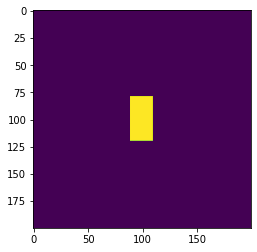

In [3]:
main[79:120,89:110]=255
plt.imshow(main)

### 2

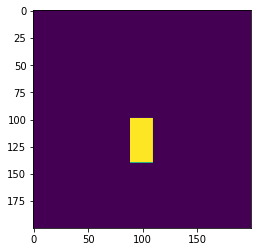

In [4]:
rows,cols = main.shape
M = np.float32([[1,0,0],[0,1,20]])
a = cv2.warpAffine(main,M,(cols,rows))
plt.imshow(a)

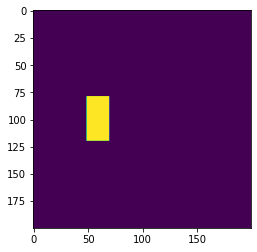

In [5]:
M = np.float32([[1,0,-40],[0,1,0]])
b = cv2.warpAffine(main,M,(cols,rows))
plt.imshow(b)

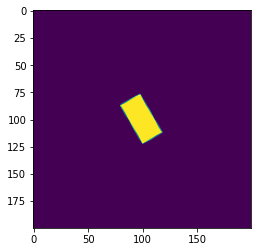

In [6]:
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),30,1)
c = cv2.warpAffine(main,M,(cols,rows))
plt.imshow(c)

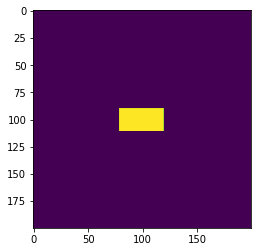

In [7]:
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
d = cv2.warpAffine(main,M,(cols,rows))
plt.imshow(d)

### 3

In [8]:
main_f = np.fft.fft2(main)
a_f = np.fft.fft2(a)
b_f = np.fft.fft2(b)
c_f = np.fft.fft2(c)
d_f = np.fft.fft2(d)

In [9]:
main_l = np.log(np.abs(np.fft.fftshift(main_f)))
a_l = np.log(np.abs(np.fft.fftshift(a_f)))
b_l = np.log(np.abs(np.fft.fftshift(b_f)))
c_l = np.log(np.abs(np.fft.fftshift(c_f)))
d_l = np.log(np.abs(np.fft.fftshift(d_f)))

In [56]:
main_s = np.angle(main_f)
a_s = np.angle(np.fft.fftshift(a_f))
b_s = np.angle(np.fft.fftshift(b_f))
c_s = np.angle(np.fft.fftshift(c_f))
d_s = np.angle(np.fft.fftshift(d_f))

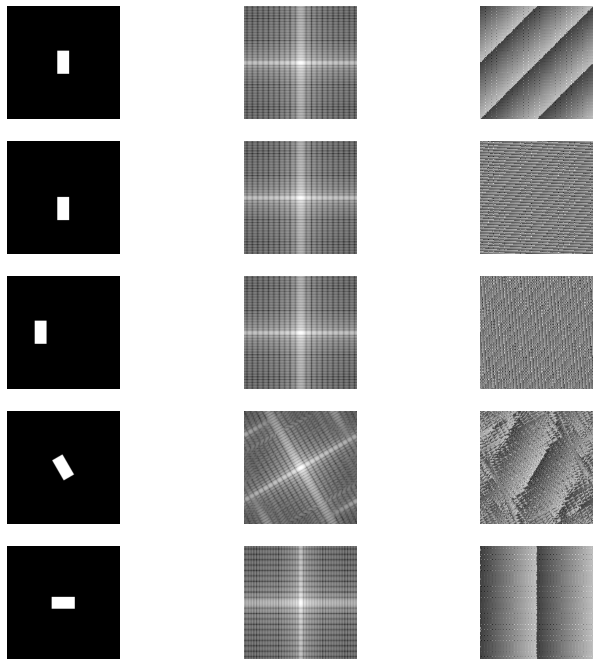

In [57]:
plt.figure(figsize=(12,12))
plt.subplot(531)
plt.axis('off')
plt.imshow(main,cmap='gray')
plt.subplot(532)
plt.axis('off')
plt.imshow(main_l,cmap='gray')
plt.subplot(533)
plt.axis('off')
plt.imshow(main_s,cmap='gray')
plt.subplot(534)
plt.axis('off')
plt.imshow(a,cmap='gray')
plt.subplot(535)
plt.axis('off')
plt.imshow(a_l,cmap='gray')
plt.subplot(536)
plt.axis('off')
plt.imshow(a_s,cmap='gray')
plt.subplot(537)
plt.axis('off')
plt.imshow(b,cmap='gray')
plt.subplot(538)
plt.axis('off')
plt.imshow(b_l,cmap='gray')
plt.subplot(539)
plt.axis('off')
plt.imshow(b_s,cmap='gray')
plt.subplot(5,3,10)
plt.axis('off')
plt.imshow(c,cmap='gray')
plt.subplot(5,3,11)
plt.axis('off')
plt.imshow(c_l,cmap='gray')
plt.subplot(5,3,12)
plt.axis('off')
plt.imshow(c_s,cmap='gray')
plt.subplot(5,3,13)
plt.axis('off')
plt.imshow(d,cmap='gray')
plt.subplot(5,3,14)
plt.axis('off')
plt.imshow(d_l,cmap='gray')
plt.subplot(5,3,15)
plt.axis('off')
plt.imshow(d_s,cmap='gray')

### 4

In [49]:
(X,Y) = np.where(main_s == 0)

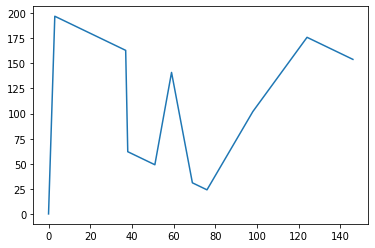

In [50]:
plt.plot(X,Y)

### 5

In [52]:
metacarpal = plt.imread('metacarpal.png','gray')

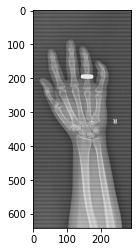

In [53]:
plt.imshow(metacarpal,cmap='gray')

In [62]:
fourier = np.fft.fft2(metacarpal)
magnitude = 20*np.log(np.abs(np.fft.fftshift(fourier)))
phase = np.angle(np.fft.fftshift(fourier))

### 5, 7

In [103]:
def reject_filter(shape, min=0, max=0):
    P, Q = shape
    H = np.zeros((P, Q))

    for u in range(0, P):
        for v in range(0, Q):
            D_uv = np.sqrt((u - P / 2) ** 2 + (v - Q / 2) ** 2)

            if D_uv <= max and D_uv >= min:
                H[u, v] = 0.0
            else:
                H[u, v] = 1.0

    return H

In [123]:
img_shape = metacarpal.shape

H1 = reject_filter(img_shape,0.5,2)

fshift = np.fft.fftshift(fourier)

NotchFilter = H1
NotchRejectCenter = fshift * NotchFilter 
NotchReject = np.fft.ifftshift(NotchRejectCenter)
inverse_NotchReject = np.fft.ifft2(NotchReject)  # Compute the inverse DFT of the result

### 8

In [125]:
Result = np.abs(inverse_NotchReject)

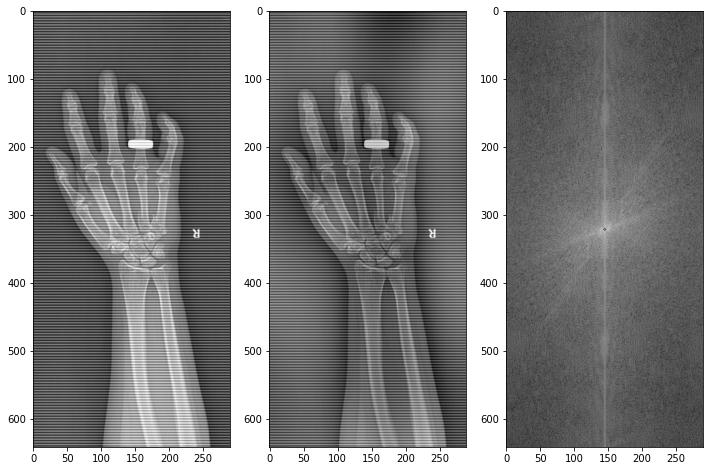

In [129]:
plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(metacarpal,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(Result,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(magnitude * NotchFilter,cmap='gray')